### Entrada de dados

In [81]:
import pandas as pd
import numpy as np
import networkx as nx
import pylab

data = pd.read_csv("edges1_.csv",names=["Inicio", "Fim", "Peso"], encoding = "ISO-8859-1")
data

,Inicio,Fim,Peso
0,s,t,6
1,s,y,7
2,t,y,8
3,t,x,5
4,t,z,-4
5,x,t,-2
6,y,x,-3
7,y,z,9
8,z,x,7
9,z,s,2


In [17]:
for i in range(len(data["Inicio"])):
    G = nx.Graph()
    G.add_edge(data["Inicio"][i], data["Fim"][i], weight=data["Peso"][i])

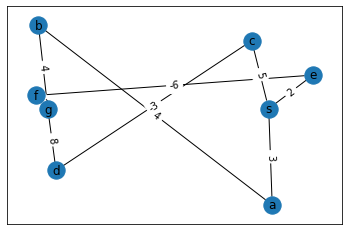

In [18]:

def plot(Grafo):
    G = nx.Graph()
    for i in range(len(Grafo["Inicio"])):
        G.add_edge(Grafo["Inicio"][i], Grafo["Fim"][i], weight=Grafo["Peso"][i])

    pos=nx.spring_layout(G)
    nx.draw_networkx(G,pos, arrows=True) #, arrows=True
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    pylab.show()
    return G
retorno = plot(data)

# Algoritmo de Bellman-Ford

In [82]:
N = {}
vertices = []
for i in range(len(data["Inicio"])):
    if data["Inicio"][i] not in vertices:
        vertices.append(data["Inicio"][i])
    N[(data["Inicio"][i],data["Fim"][i])] = data["Peso"][i]

todos_vertices = []
vertices_encontraveis = []

for i in N:
    if i[0] not in todos_vertices:
        todos_vertices.append(i[0])
    if i[1] not in todos_vertices:
        todos_vertices.append(i[1])
    if i[1] not in vertices_encontraveis:
        vertices_encontraveis.append(i[1])
vertices_encontraveis
todos_vertices = sorted(todos_vertices)

In [23]:
for k in todos_vertices:

    vertice_atual = 's'
    vertice_anterior = -1
    caminhos = {}
    vertices_descobertos = []
    vertices_passados = []

    for i in todos_vertices:
        if i != vertice_atual:
            caminhos[i] = ["",np.inf]
        else:
            vertices_passados.append(i)
            vertices_descobertos.append(i)
            caminhos[i] = [i,0]


    for i in range(len(todos_vertices)):
        aux = np.Inf
        for i in N:

            if vertice_atual not in vertices_passados:
                vertices_passados.append(i[0])

            if vertice_atual == i[0]:
                #Menor vertice (proximo)
                if i[0] not in vertices_passados:
                    vertices_passados.append(i[0])
                
                if N[i] < N[i]:
                    aux = caminhos[i[1]][1]
                    if i[1] not in vertices_descobertos:
            
                        vertices_descobertos.append(i[1])
                        
                

                if caminhos[i[1]][1] > N[i] + caminhos[i[0]][1]:
                    #Salva o valor do proximo vertice no vetor
                    caminhos[i[1]][1] = N[i] + caminhos[i[0]][1]
                    #salva o caminho desse vertice (valor atual + valor anterior)
                    caminhos[i[1]][0] = i[0]
                if N[i] < aux:
                    aux = N[i]
                    proximo_vertice = i[1]
                    
        if proximo_vertice in vertices_passados:
            l3 = [x for x in vertices_descobertos if x not in vertices_passados]
            
            if(len(l3)) == 0:
                break
            else:
                vertice_atual = l3[0]
        else:
            vertice_atual = proximo_vertice
    print("Vertice Inicial: {} -> {}".format(k,caminhos))
    break

Vertice Inicial: a -> {'a': ['s', 3], 'b': ['', inf], 'c': ['s', 5], 'd': ['', inf], 'e': ['f', -1], 'f': ['e', 5], 'g': ['f', 12], 's': ['s', 0]}


In [89]:
vertice_atual = 'z'
caminhos = {}
vertices_descobertos = []
vertices_passados = []

for i in todos_vertices:
    if i != vertice_atual:
        caminhos[i] = ["",np.inf]
    else:

        vertices_passados.append(i)
        vertices_descobertos.append(i)
        caminhos[i] = [i,0]

print(caminhos)

for i in range(len(todos_vertices)):
    aux = np.Inf

    for i in N:

        if vertice_atual not in vertices_passados:
            vertices_passados.append(vertice_atual)

        if i[0] == vertice_atual:
                
            if i[1] not in vertices_descobertos:
                vertices_descobertos.append(i[1])


            if caminhos[i[1]][1] > N[i] + caminhos[i[0]][1]:
                #Salva o valor do proximo vertice no vetor
                if caminhos[i[1]][0] in vertices_passados and N[i] < 0:
                    
                    caminhos[i[1]][0] = i[0]
                    caminhos[i[1]][1] = -np.inf
                    caminhos[i[0]][1] = -np.inf

                else:
                    caminhos[i[1]][1] = N[i] + caminhos[i[0]][1]
                    #salva o caminho desse vertice (valor atual + valor anterior)
                    caminhos[i[1]][0] = i[0]
            if N[i] < aux:
                aux = N[i]
                proximo_vertice = i[1]

    if proximo_vertice in vertices_passados:
        l3 = [x for x in vertices_descobertos if x not in vertices_passados]
        if(len(l3)) != 0:
            vertice_atual = l3[0]
    else:
        vertice_atual = proximo_vertice

print(caminhos)

{'s': ['', inf], 't': ['', inf], 'x': ['', inf], 'y': ['', inf], 'z': ['z', 0]}
{'s': ['z', 2], 't': ['x', -inf], 'x': ['z', -inf], 'y': ['s', 9], 'z': ['z', 0]}


In [85]:
for k in todos_vertices:
    vertice_atual = 'y'
    caminhos = {}
    vertices_descobertos = []
    vertices_passados = []

    for i in todos_vertices:
        if i != vertice_atual:
            caminhos[i] = ["",np.inf]
        else:
            vertices_passados.append(i)
            vertices_descobertos.append(i)
            caminhos[i] = [i,0]


    for i in range(len(todos_vertices)):
        aux = np.Inf
        for i in N:
            if i[0] == vertice_atual:
                
                if i[0] not in vertices_passados:
                    vertices_passados.append(i[0])

                if i[1] not in vertices_descobertos:         
                    vertices_descobertos.append(i[1])

                if caminhos[i[1]][1] > N[i] + caminhos[i[0]][1]:
                        #Salva o valor do proximo vertice no vetor
                    caminhos[i[1]][1] = N[i] + caminhos[i[0]][1]
                        #salva o caminho desse vertice (valor atual + valor anterior)
                    caminhos[i[1]][0] = i[0]
                if N[i] < aux:
                    aux = N[i]
                    proximo_vertice = i[1]
        vertice_atual = proximo_vertice
        if proximo_vertice in vertices_passados:
                l3 = [x for x in vertices_descobertos if x not in vertices_passados]
                if(len(l3)) == 0:
                    break
                else:
                    vertice_atual = l3[0]
    

    print("Vertice Inicial: {} -> {}".format(k,caminhos))

Vertice Inicial: s -> {'s': ['z', -7], 't': ['x', -5], 'x': ['y', -3], 'y': ['y', 0], 'z': ['t', -9]}
Vertice Inicial: t -> {'s': ['z', -7], 't': ['x', -5], 'x': ['y', -3], 'y': ['y', 0], 'z': ['t', -9]}
Vertice Inicial: x -> {'s': ['z', -7], 't': ['x', -5], 'x': ['y', -3], 'y': ['y', 0], 'z': ['t', -9]}
Vertice Inicial: y -> {'s': ['z', -7], 't': ['x', -5], 'x': ['y', -3], 'y': ['y', 0], 'z': ['t', -9]}
Vertice Inicial: z -> {'s': ['z', -7], 't': ['x', -5], 'x': ['y', -3], 'y': ['y', 0], 'z': ['t', -9]}
